In [1]:
# Import Packages
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pickle

# Path to your project directory
project_dir = r'C:\Users\pcdud\OneDrive\Desktop\Data Science Classes\Final Project'

# change directory to project directory
os.chdir(project_dir)

In [2]:
# Concatenating team stats per game and team summaries
TeamStatsPerGame = pd.read_csv('Team Stats Per Game.csv')
TeamSummaries= pd.read_csv('Team Summaries.csv')

In [3]:
TeamStatsPerGame.head()

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2023,NBA,Atlanta Hawks,ATL,False,59.0,242.1,44.1,92.3,0.478,...,0.816,10.6,33.2,43.9,24.7,7.0,4.9,12.7,19.0,116.4
1,2023,NBA,Boston Celtics,BOS,False,59.0,243.4,41.8,88.2,0.474,...,0.826,9.5,35.6,45.1,26.4,6.3,5.3,13.5,19.0,117.9
2,2023,NBA,Brooklyn Nets,BRK,False,58.0,240.4,42.3,84.3,0.502,...,0.793,7.8,32.5,40.3,25.8,6.8,6.5,14.2,21.9,114.0
3,2023,NBA,Chicago Bulls,CHI,False,59.0,242.1,42.3,87.0,0.486,...,0.812,8.5,34.3,42.9,24.1,7.5,4.5,13.9,19.5,113.1
4,2023,NBA,Charlotte Hornets,CHO,False,60.0,242.5,42.0,92.2,0.455,...,0.745,11.8,33.1,44.9,25.3,8.1,5.1,13.8,20.7,112.5


In [4]:
TeamSummaries.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2023,NBA,Atlanta Hawks,ATL,False,24.9,29.0,30.0,29.0,30.0,...,11.1,23.5,0.192,0.543,12.6,75.2,0.211,State Farm Arena,472275.0,17492.0
1,2023,NBA,Boston Celtics,BOS,False,27.3,42.0,17.0,40.0,19.0,...,12.1,21.7,0.207,0.531,11.3,79.0,0.178,TD Garden,574680.0,18538.0
2,2023,NBA,Brooklyn Nets,BRK,False,28.4,34.0,24.0,32.0,26.0,...,13.1,19.3,0.199,0.526,12.1,74.0,0.224,Barclays Center,510458.0,17602.0
3,2023,NBA,Chicago Bulls,CHI,False,27.5,26.0,33.0,29.0,30.0,...,12.5,20.1,0.208,0.543,13.1,78.2,0.203,United Center,587881.0,20272.0
4,2023,NBA,Charlotte Hornets,CHO,False,25.6,17.0,43.0,19.0,41.0,...,11.8,24.9,0.192,0.552,13.0,74.9,0.215,Spectrum Center,463990.0,17185.0


In [5]:
# In anticipation of dropping common named columns, renaming the duplicates
TeamSummaries.rename(columns={"season" : "seasonR", "lg" : "lgR", "team" : "teamR", "abbreviation" : "abbreviationR", "playoffs" : "playoffsR"}, inplace=True)

In [6]:
TeamSummaries.head()

,seasonR,lgR,teamR,abbreviationR,playoffsR,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2023,NBA,Atlanta Hawks,ATL,False,24.9,29.0,30.0,29.0,30.0,...,11.1,23.5,0.192,0.543,12.6,75.2,0.211,State Farm Arena,472275.0,17492.0
1,2023,NBA,Boston Celtics,BOS,False,27.3,42.0,17.0,40.0,19.0,...,12.1,21.7,0.207,0.531,11.3,79.0,0.178,TD Garden,574680.0,18538.0
2,2023,NBA,Brooklyn Nets,BRK,False,28.4,34.0,24.0,32.0,26.0,...,13.1,19.3,0.199,0.526,12.1,74.0,0.224,Barclays Center,510458.0,17602.0
3,2023,NBA,Chicago Bulls,CHI,False,27.5,26.0,33.0,29.0,30.0,...,12.5,20.1,0.208,0.543,13.1,78.2,0.203,United Center,587881.0,20272.0
4,2023,NBA,Charlotte Hornets,CHO,False,25.6,17.0,43.0,19.0,41.0,...,11.8,24.9,0.192,0.552,13.0,74.9,0.215,Spectrum Center,463990.0,17185.0


In [7]:
# When combined, expecting 59 columns.

In [8]:
NBA = pd.concat([TeamStatsPerGame, TeamSummaries], axis="columns")

In [9]:
NBA.head()

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2023,NBA,Atlanta Hawks,ATL,False,59.0,242.1,44.1,92.3,0.478,...,11.1,23.5,0.192,0.543,12.6,75.2,0.211,State Farm Arena,472275.0,17492.0
1,2023,NBA,Boston Celtics,BOS,False,59.0,243.4,41.8,88.2,0.474,...,12.1,21.7,0.207,0.531,11.3,79.0,0.178,TD Garden,574680.0,18538.0
2,2023,NBA,Brooklyn Nets,BRK,False,58.0,240.4,42.3,84.3,0.502,...,13.1,19.3,0.199,0.526,12.1,74.0,0.224,Barclays Center,510458.0,17602.0
3,2023,NBA,Chicago Bulls,CHI,False,59.0,242.1,42.3,87.0,0.486,...,12.5,20.1,0.208,0.543,13.1,78.2,0.203,United Center,587881.0,20272.0
4,2023,NBA,Charlotte Hornets,CHO,False,60.0,242.5,42.0,92.2,0.455,...,11.8,24.9,0.192,0.552,13.0,74.9,0.215,Spectrum Center,463990.0,17185.0


In [10]:
NBA.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game',
       'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game',
       'x2p_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'seasonR', 'lgR', 'teamR', 'abbreviationR', 'playoffsR',
       'age', 'w', 'l', 'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg', 'd_rtg',
       'n_rtg', 'pace', 'f_tr', 'x3p_ar', 'ts_percent', 'e_fg_percent',
       'tov_percent', 'orb_percent', 'ft_fga', 'opp_e_fg_percent',
       'opp_tov_percent', 'opp_drb_percent', 'opp_ft_fga', 'arena', 'attend',
       'attend_g'],
      dtype='object')

In [11]:
nbaR = NBA.drop(['seasonR', 'lgR', 'teamR', 'abbreviationR', 'playoffsR'], axis=1)

In [12]:
nbaR.shape

(1814, 54)

In [13]:
# Noticed there were rows of season averages for each year.  Will drop them here.
nbaR.drop(NBA[NBA['team'] == "League Average"].index, inplace = True)

In [14]:
nbaR.shape

(1728, 54)

In [15]:
# Removed a row for each league season recorded in dataset.

In [16]:
# Exporting concatenated dataset for safe keeping.
nbaR.to_csv('nbaR.csv', index=False)

# --------------------------------------------------------------------------------------------------------------------------------------------

# Analysis #1 Which teams have the most wins in the last ten years?

In [17]:
last10years = nbaR[nbaR['season'] >= 2014]

In [18]:
last10years.shape

(300, 54)

In [19]:
last10years.info

<bound method DataFrame.info of      season   lg                team abbreviation  playoffs     g  \
0      2023  NBA       Atlanta Hawks          ATL     False  59.0   
1      2023  NBA      Boston Celtics          BOS     False  59.0   
2      2023  NBA       Brooklyn Nets          BRK     False  58.0   
3      2023  NBA       Chicago Bulls          CHI     False  59.0   
4      2023  NBA   Charlotte Hornets          CHO     False  60.0   
..      ...  ...                 ...          ...       ...   ...   
304    2014  NBA    Sacramento Kings          SAC     False  82.0   
305    2014  NBA   San Antonio Spurs          SAS      True  82.0   
306    2014  NBA     Toronto Raptors          TOR      True  82.0   
307    2014  NBA           Utah Jazz          UTA     False  82.0   
308    2014  NBA  Washington Wizards          WAS      True  82.0   

     mp_per_game  fg_per_game  fga_per_game  fg_percent  ...  tov_percent  \
0          242.1         44.1          92.3       0.478  ...  

In [20]:
TeamWins = last10years.groupby('team')['w'].sum()

In [21]:
MostWins = TeamWins.nlargest(5)

In [22]:
LeastWins = TeamWins.nsmallest(7)

In [23]:
print(MostWins)

team
Golden State Warriors    509.0
Los Angeles Clippers     478.0
Toronto Raptors          477.0
San Antonio Spurs        453.0
Boston Celtics           447.0
Name: w, dtype: float64


In [24]:
print(LeastWins)

team
Charlotte Bobcats      43.0
Orlando Magic         279.0
New York Knicks       295.0
Detroit Pistons       300.0
Charlotte Hornets     308.0
Sacramento Kings      312.0
Los Angeles Lakers    317.0
Name: w, dtype: float64


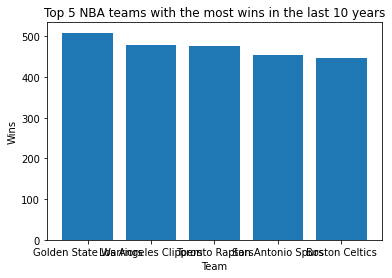

In [25]:
# Recommend using Tableau for final project visual
plt.bar(MostWins.index, MostWins.values)
plt.title('Top 5 NBA teams with the most wins in the last 10 years')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()

In [26]:
# Golden State Warriors, Los Angeles Clippers, Toronto Raptors, San Antonio Spurs, Boston Celtics

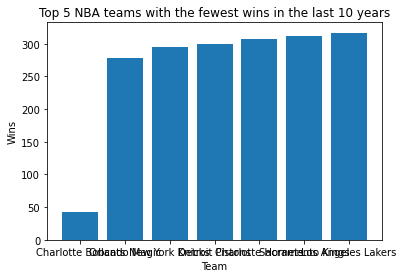

In [27]:
# Recommend using Tableau for final project visual
# Because Charlotte changed team names but have more wins than the other teams, I've extended the graph to show the actual 5 teams.
plt.bar(LeastWins.index, LeastWins.values)
plt.title('Top 5 NBA teams with the fewest wins in the last 10 years')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()

In [28]:
# Orlando Magic, New York Knicks, Detroit Pistons, Sacramento Kings, Los Angeles Lakers 

# --------------------------------------------------------------------------------------------------------------------------------------------

# Anaylsis #5 Machine Learning Model that can predict number of wins in a season.

In [29]:
# Dropping NA values

In [30]:
nbaR2 = nbaR.dropna()

In [31]:
nbaR2.to_csv('nbaR2.csv', index=False)

In [32]:
# Designating variables for the model

In [33]:
# Supervised (Model Based) Machine Learning Test
x= nbaR2[['g', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game',
       'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game',
       'x2p_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'age', 'mov', 'sos', 'srs',
       'o_rtg', 'd_rtg', 'n_rtg', 'pace', 'f_tr', 'x3p_ar', 'ts_percent',
       'e_fg_percent', 'tov_percent', 'orb_percent', 'ft_fga',
       'opp_e_fg_percent', 'opp_tov_percent', 'opp_drb_percent', 'opp_ft_fga', 'attend',
       'attend_g']]
y= nbaR2[['w']]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=2)

In [35]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(543, 44) (543, 1)
(234, 44) (234, 1)


In [36]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [37]:
predictions = lm.predict(x_test)
predictions

array([[29.0980293 ],
       [45.07266082],
       [51.54250164],
       [37.07134399],
       [31.78194076],
       [49.22232782],
       [18.00984988],
       [50.45596039],
       [41.11367513],
       [50.29716705],
       [27.75445947],
       [19.03301911],
       [46.3218986 ],
       [57.64197603],
       [40.30562738],
       [44.93022713],
       [51.97317842],
       [37.34408983],
       [27.04693854],
       [59.66011334],
       [60.03008231],
       [26.94432058],
       [29.30657111],
       [34.84030603],
       [41.95205554],
       [40.16896449],
       [45.9001033 ],
       [49.09261839],
       [53.42000301],
       [29.70346565],
       [29.73031773],
       [17.18470353],
       [46.96352868],
       [26.84279572],
       [31.91876216],
       [27.58874849],
       [24.28403122],
       [56.57675242],
       [37.57786981],
       [52.61479425],
       [15.53873448],
       [38.87688442],
       [16.12780188],
       [52.65814883],
       [41.82134223],
       [28

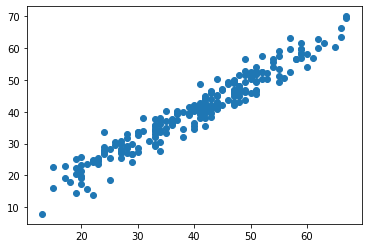

In [38]:
plt.scatter(y_test, predictions)

In [39]:
print("Score:", lm.score(x_test, y_test))

Score: 0.9347620296094794


In [80]:
# Evaluating model

In [40]:
metrics.mean_absolute_error(y_test, predictions)

2.493987261504683

In [41]:
metrics.mean_squared_error(y_test, predictions)

9.591163546497537

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

3.096960372122565

In [43]:
# k-Fold Cross Validation to ensure "score" of the model.

In [44]:
kfold = KFold(n_splits=10, shuffle=True, random_state=2)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  19
  21  23  24  25  26  27  28  29  31  32  33  34  35  36  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  63  64  65  66  69  70  71  72  73  74  75  76  78  79  81  82
  83  84  85  86  87  88  90  91  92  93  94  95  96  97  98 100 102 103
 104 105 106 108 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 130 131 132 133 134 135 136 137 138 139 140 143 144
 145 147 148 149 150 151 152 153 154 155 156 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 175 176 177 178 179 180 181 182 183
 184 186 187 188 189 190 191 192 193 194 195 196 197 200 201 202 203 205
 206 207 208 209 210 211 212 214 215 216 217 218 219 220 221 222 223 224
 225 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 251 252 253 254 255 256 257 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274

In [45]:
print(cross_val_score(lm, x,y, cv=10))

[0.89860974 0.9166862  0.9422977  0.94543226 0.92758465 0.96774053
 0.91113891 0.9442161  0.95269393 0.90523465]


In [46]:
# All scores are satisfactory

In [47]:
# Recursive Feature Elimination

In [48]:
# Designating RFE object and ten features
rfe = RFE(lm, n_features_to_select=10)

In [49]:
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [50]:
SelectedFeatures = x.iloc[:, rfe.support_]

In [51]:
SelectedFeatures.head()

,fg_percent,x2p_percent,o_rtg,d_rtg,n_rtg,x3p_ar,ts_percent,e_fg_percent,ft_fga,opp_e_fg_percent
0,0.478,0.542,114.6,115.0,-0.4,0.329,0.571,0.535,0.192,0.543
1,0.474,0.563,117.9,111.7,6.2,0.479,0.602,0.565,0.207,0.531
2,0.502,0.570,115.8,114.1,1.7,0.381,0.609,0.577,0.199,0.526
3,0.486,0.549,112.5,112.8,-0.3,0.331,0.584,0.546,0.208,0.543
4,0.455,0.528,110.0,116.3,-6.3,0.360,0.548,0.514,0.192,0.552


In [52]:
# Top ten variable in the ML model.  Will rebuild and retest the ML model.

In [53]:
x2= nbaR2[['fg_percent', 'x2p_percent', 'o_rtg', 'd_rtg', 'n_rtg', 
          'x3p_ar', 'ts_percent', 'e_fg_percent', 'ft_fga', 'opp_e_fg_percent']]
y2= nbaR2[['w']]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x2,y2, test_size = .3, random_state=2)

In [55]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(543, 10) (543, 1)
(234, 10) (234, 1)


In [56]:
lm2 = LinearRegression()
lm2.fit(x_train, y_train)

LinearRegression()

In [57]:
predictions2 = lm2.predict(x_test)
predictions2

array([[29.59561893],
       [41.83040247],
       [49.9069303 ],
       [39.2634911 ],
       [41.40424147],
       [49.84229155],
       [18.94846347],
       [51.20062534],
       [38.63456355],
       [51.23756029],
       [28.68848976],
       [18.63761242],
       [46.13429012],
       [55.59776327],
       [37.79310457],
       [44.01632761],
       [51.22859019],
       [34.06810493],
       [26.91428329],
       [59.16029199],
       [58.87995227],
       [24.89189006],
       [29.3452982 ],
       [35.04845162],
       [43.95427353],
       [38.88219372],
       [48.13796672],
       [58.49491873],
       [53.13060724],
       [30.59060343],
       [28.65514891],
       [17.57725923],
       [46.98502135],
       [26.23202858],
       [32.13741061],
       [25.18517358],
       [30.38185346],
       [56.28805781],
       [37.73166555],
       [53.0956014 ],
       [21.72210837],
       [36.82851895],
       [15.91647635],
       [53.80674623],
       [45.20709925],
       [28

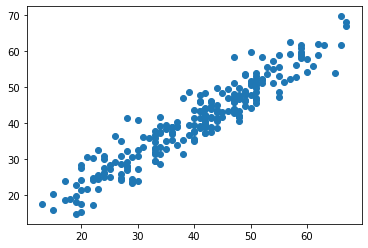

In [58]:
plt.scatter(y_test, predictions2)

In [59]:
print("Score:", lm2.score(x_test, y_test))

Score: 0.8908009225886331


In [81]:
# Evaluating model

In [60]:
metrics.mean_absolute_error(y_test, predictions2)

3.1268111081291994

In [61]:
metrics.mean_squared_error(y_test, predictions2)

16.054242710334993

In [62]:
np.sqrt(metrics.mean_squared_error(y_test, predictions2))

4.006774601888031

In [63]:
kfold2 = KFold(n_splits=10, shuffle=True, random_state=2)
for train, test in kfold2.split(x2,y2):
    print('train: %s, test: %s' % (train,test))

train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  19
  21  23  24  25  26  27  28  29  31  32  33  34  35  36  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  63  64  65  66  69  70  71  72  73  74  75  76  78  79  81  82
  83  84  85  86  87  88  90  91  92  93  94  95  96  97  98 100 102 103
 104 105 106 108 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 130 131 132 133 134 135 136 137 138 139 140 143 144
 145 147 148 149 150 151 152 153 154 155 156 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 175 176 177 178 179 180 181 182 183
 184 186 187 188 189 190 191 192 193 194 195 196 197 200 201 202 203 205
 206 207 208 209 210 211 212 214 215 216 217 218 219 220 221 222 223 224
 225 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 251 252 253 254 255 256 257 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274

In [64]:
print(cross_val_score(lm2, x2,y2, cv=10))

[0.56494241 0.8807151  0.89816647 0.93411994 0.74999347 0.96107912
 0.90926267 0.94846709 0.95108553 0.91020263]


In [65]:
# Quite a big swing in accuracy scores compared to the original.

In [66]:
# Pickling latest model

In [67]:
pickle.dump(lm2, open('model.pkl','wb'))

In [68]:
# Getting parameters for my Streamlit API

In [69]:
nbaR2['fg_percent'].describe()

count    777.000000
mean       0.457678
std        0.018646
min        0.408000
25%        0.444000
50%        0.457000
75%        0.469000
max        0.545000
Name: fg_percent, dtype: float64

In [70]:
nbaR2['x2p_percent'].describe()

count    777.000000
mean       0.492528
std        0.028690
min        0.427000
25%        0.472000
50%        0.489000
75%        0.511000
max        0.585000
Name: x2p_percent, dtype: float64

In [71]:
nbaR2['o_rtg'].describe()

count    777.000000
mean     107.415315
std        4.260727
min       92.200000
25%      104.500000
50%      107.100000
75%      110.500000
max      118.300000
Name: o_rtg, dtype: float64

In [72]:
nbaR2['d_rtg'].describe()

count    777.000000
mean     107.243115
std        4.046031
min       94.100000
25%      104.500000
50%      107.100000
75%      110.100000
max      120.300000
Name: d_rtg, dtype: float64

In [73]:
nbaR2['n_rtg'].describe()

count    777.000000
mean       0.172201
std        4.745644
min      -15.200000
25%       -3.100000
50%        0.300000
75%        3.600000
max       11.600000
Name: n_rtg, dtype: float64

In [74]:
nbaR2['x3p_ar'].describe()

count    777.000000
mean       0.243377
std        0.101290
min        0.013000
25%        0.180000
50%        0.235000
75%        0.318000
max        0.519000
Name: x3p_ar, dtype: float64

In [75]:
nbaR2['ts_percent'].describe()

count    777.000000
mean       0.542161
std        0.023583
min        0.469000
25%        0.525000
50%        0.540000
75%        0.558000
max        0.610000
Name: ts_percent, dtype: float64

In [76]:
nbaR2['e_fg_percent'].describe()

count    777.000000
mean       0.501018
std        0.026306
min        0.428000
25%        0.482000
50%        0.498000
75%        0.519000
max        0.582000
Name: e_fg_percent, dtype: float64

In [77]:
nbaR2['ft_fga'].describe()

count    777.000000
mean       0.221363
std        0.029004
min        0.143000
25%        0.200000
50%        0.219000
75%        0.240000
max        0.303000
Name: ft_fga, dtype: float64

In [78]:
nbaR2['opp_e_fg_percent'].describe()

count    777.000000
mean       0.500281
std        0.024869
min        0.433000
25%        0.483000
50%        0.499000
75%        0.517000
max        0.578000
Name: opp_e_fg_percent, dtype: float64